<a href="https://colab.research.google.com/github/rajan-dhinoja/Machine_Learning_Mastery/blob/main/Dimensionality_Reduction_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Dimesionality Reduction Template**
---



# ***Step-A: Data Preprocessing:-***

## Step-1: Import Required Dependencies:-
Import essential libraries and modules for data manipulation, visualization, and preprocessing...

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
import warnings
warnings.filterwarnings('ignore')

# Set the option to prevent silent downcasting
np.set_printoptions(formatter={'float': '{:,.2f}'.format}, suppress=True, precision=2)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('future.no_silent_downcasting', True)

print("✅ Required Libraries are Imported - Done!\n")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Required Libraries are Imported - Done!



## Step-2: Load the Dataset and Display Different overviews of Datasets:-

In [2]:
dataset = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets/DIMENSIONALITY_REDUCTION/wine.csv'))
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.60,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.20,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.60,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.80,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.00,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
# Seperate the whole datset into categorical and numerical columns...

categorical_cols = dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(exclude=['object']).columns

if categorical_cols.empty:
  print("❌ No Categorical Columns Found...")
else:
  print("✅ Categorical Columns found: \n", categorical_cols, "\n")

if numerical_cols.empty:
  print("❌ No Numerical Columns Found...")
else:
  print("✅ Numerical Columns found: \n", numerical_cols)

❌ No Categorical Columns Found...
✅ Numerical Columns found: 
 Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')


In [4]:
print("> Shape of the Dataset: ", dataset.shape, "\n")
print("> Information about Dataset:")
print(dataset.info(), "\n")
print("> Statistical summary of the Dataset:")
# print(dataset.describe().map(lambda x: round(x, 4)))
print(dataset.describe().to_string(header=True))

> Shape of the Dataset:  (178, 14) 

> Information about Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float

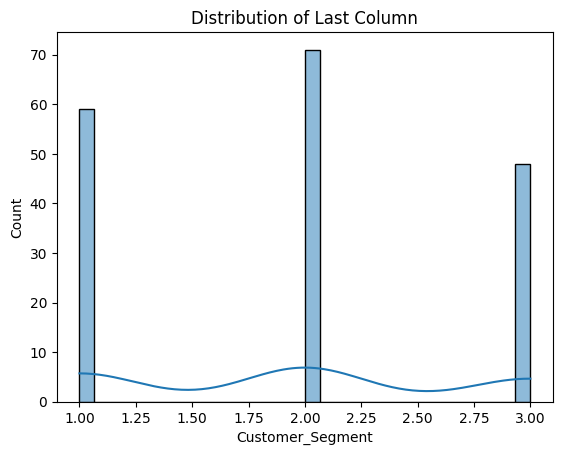

In [5]:
# plt.figure(figsize=(10, 6))
# Plot target distribution
sns.histplot(dataset.iloc[:, -1], bins=30, kde=True)
plt.title('Distribution of Last Column')
plt.show()

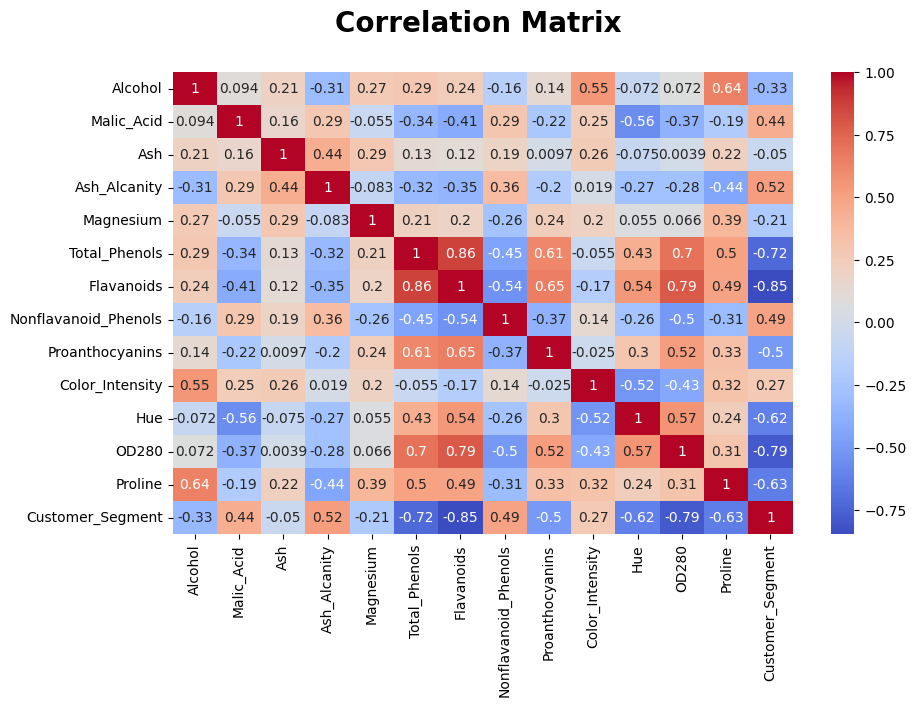

In [6]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix \n',fontsize=20,  fontweight=800)
plt.show()

## Step-3:- Checking the Dataset:-

### Step-3.1: Checking any Duplicate Data and Handling them:-

In [7]:
if dataset.duplicated().any():
  dataset.drop_duplicates(inplace=True)
  print("✅ Duplicate Data(or Identical Rows) found and Removed...")
else:
    print("❌ No Duplicate Data(or Identical Rows) found...")

❌ No Duplicate Data(or Identical Rows) found...


### Step-3.2: Cheking any Missing Data and Handling them:-

In [8]:
# Here from the module named impute of the library scikit-learn, we are using the SimpleImputer Class to Handle the Missing Values.
from sklearn.impute import SimpleImputer

missing_data_counts = dataset.isnull().sum() + dataset.isin(['', 'N/A', 'Unknown', 'NaN']).sum()

# if dataset.isnull().values.any() or dataset.isin(['', 'NaN', 'N/A', 'Unknown']).any().any():
if not (missing_data_counts > 0).any():
  print("❌ No Missing Data found...")
else:
  categorical_missing_counts = dataset[categorical_cols].isnull().sum() + dataset[categorical_cols].isin(['', 'N/A', 'Unknown', 'NaN']).sum()
  numerical_missing_counts = dataset[numerical_cols].isnull().sum()

  # Replace "Unknown" with NaN in categorical columns
  for col in categorical_cols:
    dataset[col] = dataset[col].replace('Unknown', np.nan)


  # Check if there are any missing values (categorical or numerical)
  if categorical_missing_counts.any() or numerical_missing_counts.any():
      # Print missing counts for categorical columns in the desired format
      print("⚠️ Missing Data Found! Handling them...\n")
      print("Missing Data Counts in Categorical Columns: \n", categorical_missing_counts)
      print("\n")
      print("Missing Data Counts in Numerical Columns: \n", numerical_missing_counts)
      print("\n")

      # Create imputers for categorical and numerical features
      categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
      numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

      # Apply imputers to the selected columns in X
      if len(categorical_cols) > 0:
        categorical_cols_for_impution = [col for col in categorical_cols if col != dataset.columns[-1]]
        dataset[categorical_cols_for_impution] = categorical_imputer.fit_transform(dataset[categorical_cols_for_impution])

      # Exclude the dependent variable column (last column) if it's numerical
      numerical_cols_for_impution = [col for col in numerical_cols if col != dataset.columns[-1]]
      if len(numerical_cols_for_impution) > 0:
          dataset[numerical_cols_for_impution] = numerical_imputer.fit_transform(dataset[numerical_cols_for_impution])
      # if len(numerical_cols) > 0:
          # dataset[numerical_cols] = numerical_imputer.fit_transform(dataset[numerical_cols])
      print("✅ Missing Data Handled Successfully...")
      # print("New Data with replaced missing values: \n", dataset.head(10).to_string(header=True))



❌ No Missing Data found...


### Step-3.3: Checking any Synonyms or Aliases and Handling them:-

In [9]:
# for col in dataset.columns:
#   value_counts_dataset = dataset[col].value_counts().rename_axis('Unique Values: ').reset_index(name='Counts: ')

#   print(f"Column: \t\t'{col}'")
#   print(value_counts_dataset.T.to_string(header=False), "\n")

### Step-3.4: Checking for Stopwords and Stemming them:-

In [10]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

if categorical_cols.empty:
  print("❌ No Stemming needed! No Categorical Columns Found...")
else:
    nltk.download('stopwords')

    stop_words = set(stopwords.words('english'))
    # stop_words = stop_words.remove('not')
    # print("\n Stop Words are: ", stop_words, "\n")
    def stemming(text):
        words = text.lower().split()

        stemmer = PorterStemmer()
        stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]
        return ' '.join(stemmed_words)  # Join stemmed words back into a string

    # Apply the stemming function to the specified columns
    for column in categorical_cols:
        dataset[column] = dataset[column].astype(str).apply(stemming)

    print("✅ Stemming Completed Successfully... \n")
    # print(dataset.head().to_string(header=True))

❌ No Stemming needed! No Categorical Columns Found...


### Step-3.5: Checking any Categorical Data and Encoding them:-

In [11]:
import scipy.sparse
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# X = dataset.iloc[:, 1:-1]
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1].values

repeating_cols = []

if categorical_cols.empty:
  print("❌ No Encoding needed! No Categorical Columns Found...")
else:
  for col in categorical_cols:

      # Matrix of Feature
      if col != dataset.columns[-1]:
        print(f"> String Values present in Column '{col}'.")
        # Check for repeating values within the categorical column
        value_counts = dataset[col].value_counts()
        repeating_values = value_counts[value_counts > 1].index.tolist()
        if repeating_values:
          repeating_cols.append(col)
          # print(f"\t- Also, Categorical values found in column '{col}': {repeating_values}.")
          print(f"\t- Also, Categorical values found in column '{col}'.")
          print(f"\t✅ '{col}' is Encoded Successfully...\n")

        else:
          print(f"\t❌ But No Categorical values found in column '{col}'.\n")

      # Dependent Variable/Output
      if col == dataset.columns[-1]:
        print(f"> String Values present in Column '{col}'(Output Column).")
        # Check for repeating values within the categorical column
        value_counts = dataset[col].value_counts()
        repeating_values = value_counts[value_counts > 1].index.tolist()
        if repeating_values:
          # print(f"\t- Also, Categorical values found in column '{col}': {repeating_values}.")
          print(f"\t- Also, Categorical values found in column '{col}'.")
          le = LabelEncoder()
          y = le.fit_transform(dataset[col])
          print(f"\t✅ '{col}' is Encoded Successfully...\n")
        else:
          print(f"\t❌ But No Categorical values found in column '{col}'.\n")

  print("=> Repeating Columns in Matrix of Features(X): ", repeating_cols, "\n")
  if repeating_cols:
    encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), repeating_cols)], remainder='passthrough')
    encoder_transform = encoder.fit_transform(X)

    # Conditional conversion to dense array
    if scipy.sparse.issparse(encoder_transform):  # Check if sparse
      X = encoder_transform.toarray()
    else:
      X = encoder_transform

  else:
    print("❌ No Repeating Columns found in Matrix of Features(X). \n")

  # print("Matrix of Features(X): \n", pd.DataFrame(X).head().to_string(header=True))
  # print("\n")
  # print("Dependent Variable(y): \n", pd.DataFrame(y).head().to_string(header=False, index=False))


❌ No Encoding needed! No Categorical Columns Found...


## Step-4: Split the Dataset into the Training set and Test set:-

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data Splitted Successfully...\n")

# print("Printing Training Sets: ")
# print("> X_train: \n", (pd.DataFrame(X_train).head()).to_string(), "\n")
# print("> X_test: \n", (pd.DataFrame(X_test).head()).to_string(), "\n")
# print("\n")
# print("Printing Test Sets: ")
# print("> y_train: \n", (pd.DataFrame(y_train).head()).to_string(header=False), "\n")
# print("> y_test: \n", (pd.DataFrame(y_test).head()).to_string(header=False), "\n")

✅ Data Splitted Successfully...



## Step-5: Feature Scaling:-

In [13]:
""" Here we are not applying Feature Scaling in Dependent Variable (y), because there are only 0 and 1 values in y """
# StandardScaler class from scikit-learn, which is a tool for standardization and Normalization.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Convert X_train and X_test to NumPy arrays if they are DataFrames
X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test

# Iterate through columns of X_train and X_test
for col in range(X_train.shape[1]):  # Use range to get column indices
    # Check if all values in the column are 0 or 1
    if np.all(np.isin(X_train[:, col], [0, 1])):
        continue  # Skip scaling for this column
    else:
        # Reshape the column before scaling
        X_train[:, col] = scaler.fit_transform(X_train[:, col].reshape(-1, 1)).flatten()
        X_test[:, col] = scaler.transform(X_test[:, col].reshape(-1, 1)).flatten()

print("✅ Feature Scaling is Done Successfully...\n")

# print("Printing Training Sets after Feature Scaling:")
# print("> X_train: \n", (pd.DataFrame(X_train).head()).to_string(), "\n")
# print("\n")
# print("Printing Test Sets after Feature Scaling:")
# print("> X_test: \n", (pd.DataFrame(X_test).head()).to_string(), "\n")
# print("\n")
# print(pd.DataFrame(X).head().to_string())

✅ Feature Scaling is Done Successfully...



# ***Step-B: Model Builing & Evaluation...***

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression

models = {
    PCA(n_components=2),
    KernelPCA(n_components=2, kernel='rbf'),
    LDA(n_components=2),
    # TSNE(n_components=2, perplexity=30, random_state=42)
}

# Model Testing and Evaluation
model_predictions = {}  # Store model accuracy

for model in models:
  if isinstance(model, LDA):
    X_train = model.fit_transform(X_train, y_train)
    X_test = model.transform(X_test)
  else:
    X_train = model.fit_transform(X_train)
    X_test = model.transform(X_test)

  classifier = LogisticRegression(random_state = 0)
  classifier.fit(X_train, y_train)

  # model.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)

  # Calculate accuracy and store
  accuracy = accuracy_score(y_test, y_pred)
  model_predictions[model] = accuracy

  cm = confusion_matrix(y_test, y_pred)
  # cv_score = cross_val_score(model, X_train, y_train, cv=5)
  print(f"✅ {model.__class__.__name__} is trained Sucessfully...")
  print(f"-> {model.__class__.__name__}:-")
  print(f" Accuracy: \t {accuracy:.2f}")
  print(f" Confusion Matrix: \n", cm)
  # print(f"\t  Precision: \t {precision_score(y_test, y_pred):.2f}")
  # print(f"\t Recall: \t\t {recall_score(y_test, y_pred):.2f}")
  # print(f"\t  F1 Score: \t {f1_score(y_test, y_pred):.2f}")
  # print(f"\t  ROC-AUC Score: {roc_auc_score(y_test, y_pred):.2f}\n")
  print("\n")



✅ PCA is trained Sucessfully...
-> PCA:-
 Accuracy: 	 1.00
 Confusion Matrix: 
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


✅ LinearDiscriminantAnalysis is trained Sucessfully...
-> LinearDiscriminantAnalysis:-
 Accuracy: 	 1.00
 Confusion Matrix: 
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


✅ KernelPCA is trained Sucessfully...
-> KernelPCA:-
 Accuracy: 	 1.00
 Confusion Matrix: 
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]




# ***Step-C: Saving the Model & Testing It...***

## Step-1: Saving the Model:-


In [15]:
import pickle

for model in models:
    # Save each model with its name
    model_filename = f"{model.__class__.__name__}.sav"
    pickle.dump(model, open(model_filename, "wb"))

    print(f"✅ Model saved: {model_filename}")

✅ Model saved: PCA.sav
✅ Model saved: LinearDiscriminantAnalysis.sav
✅ Model saved: KernelPCA.sav


## Step-2: Selecting the Best Model:-


In [18]:
# Select the best model
best_model = max(model_predictions, key=model_predictions.get)
# Get the best accuracy from the model_predictions dictionary
best_accuracy = model_predictions[best_model]
best_models = [model for model, accuracy in model_predictions.items() if accuracy == best_accuracy]

# Print the best model(s)
print("The Best Performing Model(s) are:")
for model in best_models:
    print(f"\t - '{model.__class__.__name__}' \n\t\t\t with Accuracy: {model_predictions[model]:.2f}")
# print(f"The Best Performing Model is '{best_model.__class__.__name__}' with Accuracy : {model_predictions[best_model]:.2f}")

The Best Performing Model(s) are:
	 - 'PCA' 
			 with Accuracy: 1.00
	 - 'LinearDiscriminantAnalysis' 
			 with Accuracy: 1.00
	 - 'KernelPCA' 
			 with Accuracy: 1.00
